# Baseline scores

In [1]:
import numpy as np
import math
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/Downscaling_CM/utils"
os.chdir(path)
import rescaling
path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/Downscaling_CM/data"
os.chdir(path)

In [2]:
lat_bnd = [-4, 2]
lon_bnd = [-4, 5]
week_2km = xr.open_dataset("random_week_2km.nc")
bilin_week = xr.open_dataset("bilin_test.nc")
bicubic_week = xr.open_dataset("bicubic_test.nc")

In this notebook, it will be interesting to look at the different metrics that can be used, to see how the baselines are performing

6 metrics will be used to compare the downscalings : RMSE, MAE, SSIM, spatial autocorrelation, Hellinger distance and Perkins score. We will compare the downscaled images with the original image

In [3]:
rescaling.upscale(week_2km,"test12")

Dataset saved as  test12


-1

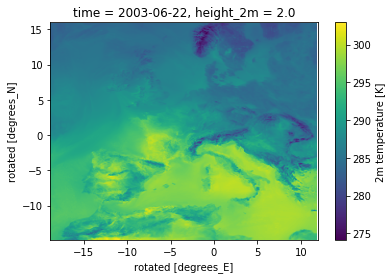

In [8]:
bicubic_week.T_2M.isel(time = 0).plot()

In [6]:
bilin_week.T_2M.isel(time = 0)[1536:][5]

<xarray.DataArray 'T_2M' (rlon: 1542)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    time       datetime64[ns] 2003-06-22
  * rlon       (rlon) float64 -18.86 -18.84 -18.82 -18.8 ... 11.92 11.94 11.96
    rlat       float64 15.96
    height_2m  float32 ...
Attributes:
    standard_name:  air_temperature
    long_name:      2m temperature
    units:          K
    grid_mapping:   rotated_pole

## RMSE 

It is one of the easiest metrics

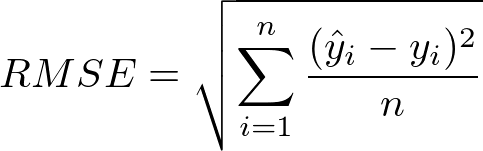

In [7]:
MSE = mean_squared_error(week_2km.T_2M.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd)).isel(time = 1), bilin_week.T_2M.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd)).isel(time = 1))

ValueError: Found input variables with inconsistent numbers of samples: [301, 300]

## MAE

Easy to understand too 

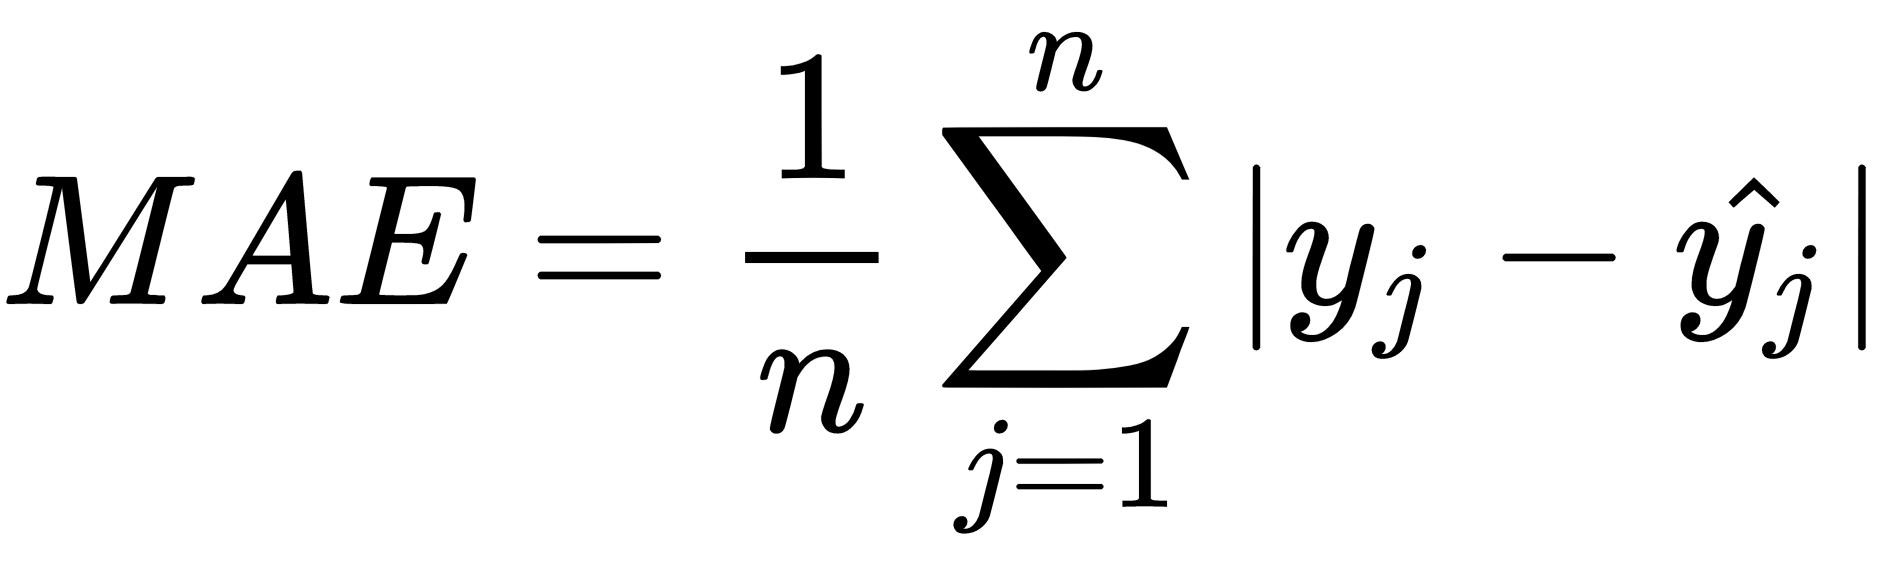